In [47]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

In [6]:
df = pd.read_csv('train.csv').query('Store == 1')

C:\Users\ryans\AppData\Local\Temp\ipykernel_51092\434669207.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train.csv').query('Store == 1')


In [12]:
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1115,1,4,2015-07-30,5020,546,1,1,0,1
2230,1,3,2015-07-29,4782,523,1,1,0,1
3345,1,2,2015-07-28,5011,560,1,1,0,1
4460,1,1,2015-07-27,6102,612,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1011635,1,6,2013-01-05,4997,635,1,0,0,1
1012750,1,5,2013-01-04,4486,619,1,0,0,1
1013865,1,4,2013-01-03,4327,578,1,0,0,1
1014980,1,3,2013-01-02,5530,668,1,0,0,1


In [26]:
df.set_index(pd.to_datetime(df['Date']), inplace=True)
df = df.sort_index()
df = df.query('Customers != 0')

In [27]:
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,,
2013-01-02,1,3,2013-01-02,5530,668,1,0,0,1
2013-01-03,1,4,2013-01-03,4327,578,1,0,0,1
2013-01-04,1,5,2013-01-04,4486,619,1,0,0,1
2013-01-05,1,6,2013-01-05,4997,635,1,0,0,1
2013-01-07,1,1,2013-01-07,7176,785,1,1,0,1
...,...,...,...,...,...,...,...,...,...
2015-07-27,1,1,2015-07-27,6102,612,1,1,0,1
2015-07-28,1,2,2015-07-28,5011,560,1,1,0,1
2015-07-29,1,3,2015-07-29,4782,523,1,1,0,1


<Axes: xlabel='Date'>

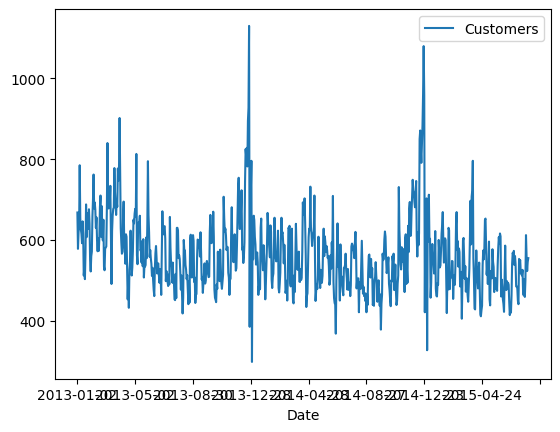

In [28]:
df.plot(kind='line', x='Date', y='Customers')

In [31]:
# p = 0.0004 so this is a stationary series
adfuller(df['Customers'])[1]


0.000409438228415652

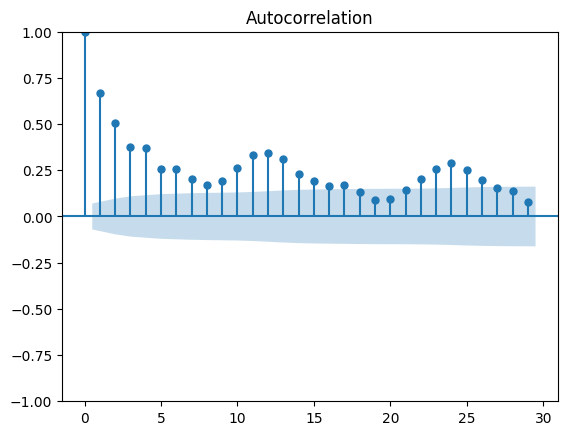

In [34]:
# ACF shows some seasonality
# not sure this is a MA, could use q=0?
plot_acf(df['Customers']);

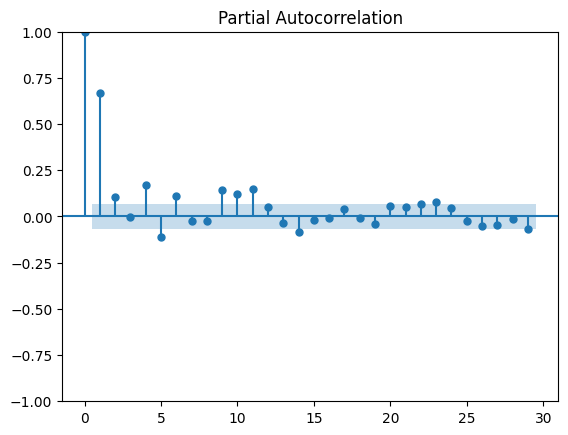

In [35]:
# pacf has snignificant correlations up to 14
# first non-significant corr is after 3, could use p=3
plot_pacf(df['Customers']);

In [41]:
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,,
2013-01-02,1,3,2013-01-02,5530,668,1,0,0,1
2013-01-03,1,4,2013-01-03,4327,578,1,0,0,1
2013-01-04,1,5,2013-01-04,4486,619,1,0,0,1
2013-01-05,1,6,2013-01-05,4997,635,1,0,0,1
2013-01-07,1,1,2013-01-07,7176,785,1,1,0,1
...,...,...,...,...,...,...,...,...,...
2015-07-27,1,1,2015-07-27,6102,612,1,1,0,1
2015-07-28,1,2,2015-07-28,5011,560,1,1,0,1
2015-07-29,1,3,2015-07-29,4782,523,1,1,0,1


In [46]:
# split train and test
train, test = df['Customers'].iloc[:-150], df['Customers'].iloc[-150:]

In [59]:
arima = ARIMA(train, order=(3,0,0)).fit()
preds = arima.forecast(len(test))
preds = pd.DataFrame(preds).set_index(test.index)

c:\Users\ryans\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ryans\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ryans\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ryans\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is ava

In [60]:
mse = mean_squared_error(preds, test)
preds

,predicted_mean
Date,
2015-01-31,597.872683
2015-02-02,592.901066
2015-02-03,587.526199
2015-02-04,583.840417
2015-02-05,581.031479
...,...
2015-07-27,572.848044
2015-07-28,572.848044
2015-07-29,572.848044


In [61]:
mse

6626.844449497498

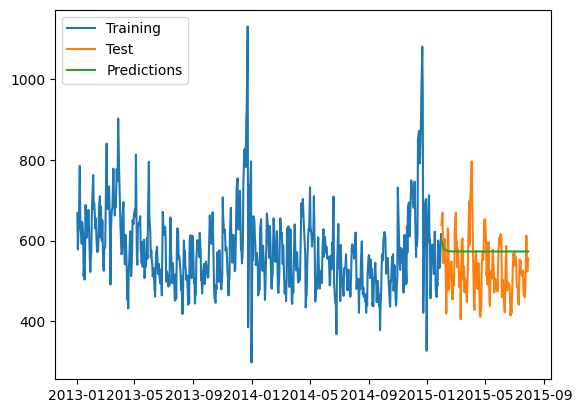

In [62]:
plt.plot(train, label='Training')
plt.plot(test, label='Test')
plt.plot(preds, label='Predictions')
plt.legend()

In [65]:
sarima = SARIMAX(train, order=(3,0,0), seasonal_order=(3,0,0,12)).fit(disp=0)
sarimaPreds = sarima.forecast(len(test))
sarimaPreds = pd.DataFrame(sarimaPreds).set_index(test.index)

c:\Users\ryans\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ryans\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ryans\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ryans\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the 

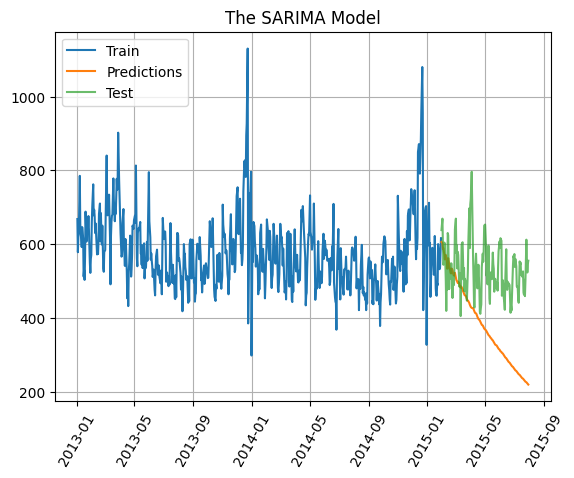

In [67]:
plt.plot(train, label='Train')
plt.plot(sarimaPreds, label='Predictions')
plt.plot(test, label='Test', alpha = 0.7)
plt.xticks(rotation = 60)
plt.title('The SARIMA Model')
plt.legend()
plt.grid();